# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = '99105431'
full_name = 'Amirmahdi Daraei'
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [4]:
df = pd.read_csv("nutrition.csv")
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [6]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.reset_index(drop=True, inplace=True)
numeric_df.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

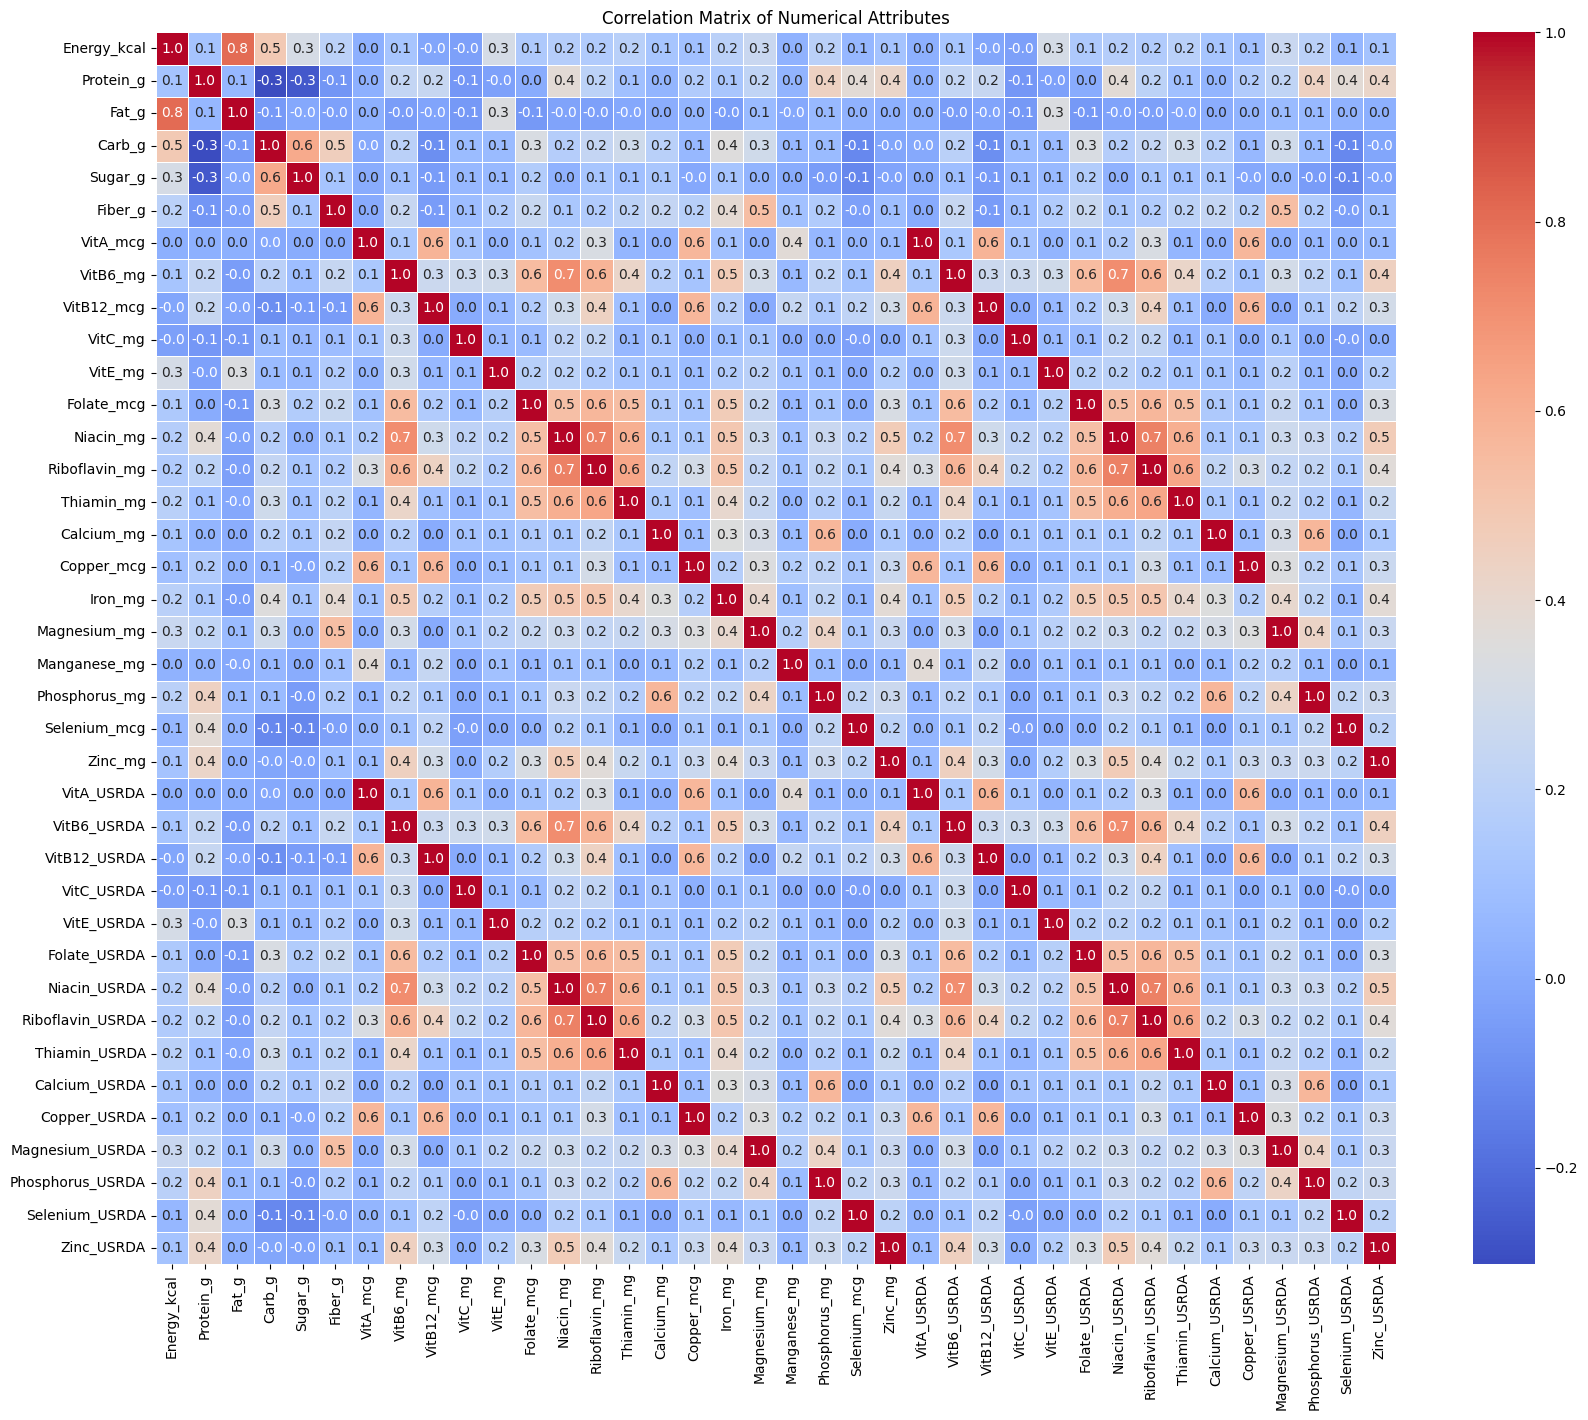

In [7]:
updated_numeric_df = numeric_df.drop(numeric_df.columns[0], axis=1)
plt.figure(figsize=(20, 16))
corr_matrix = updated_numeric_df.corr()
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".1f", 
    cmap='coolwarm', 
    linewidths=0.5, 
    annot_kws={"size": 10}
)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

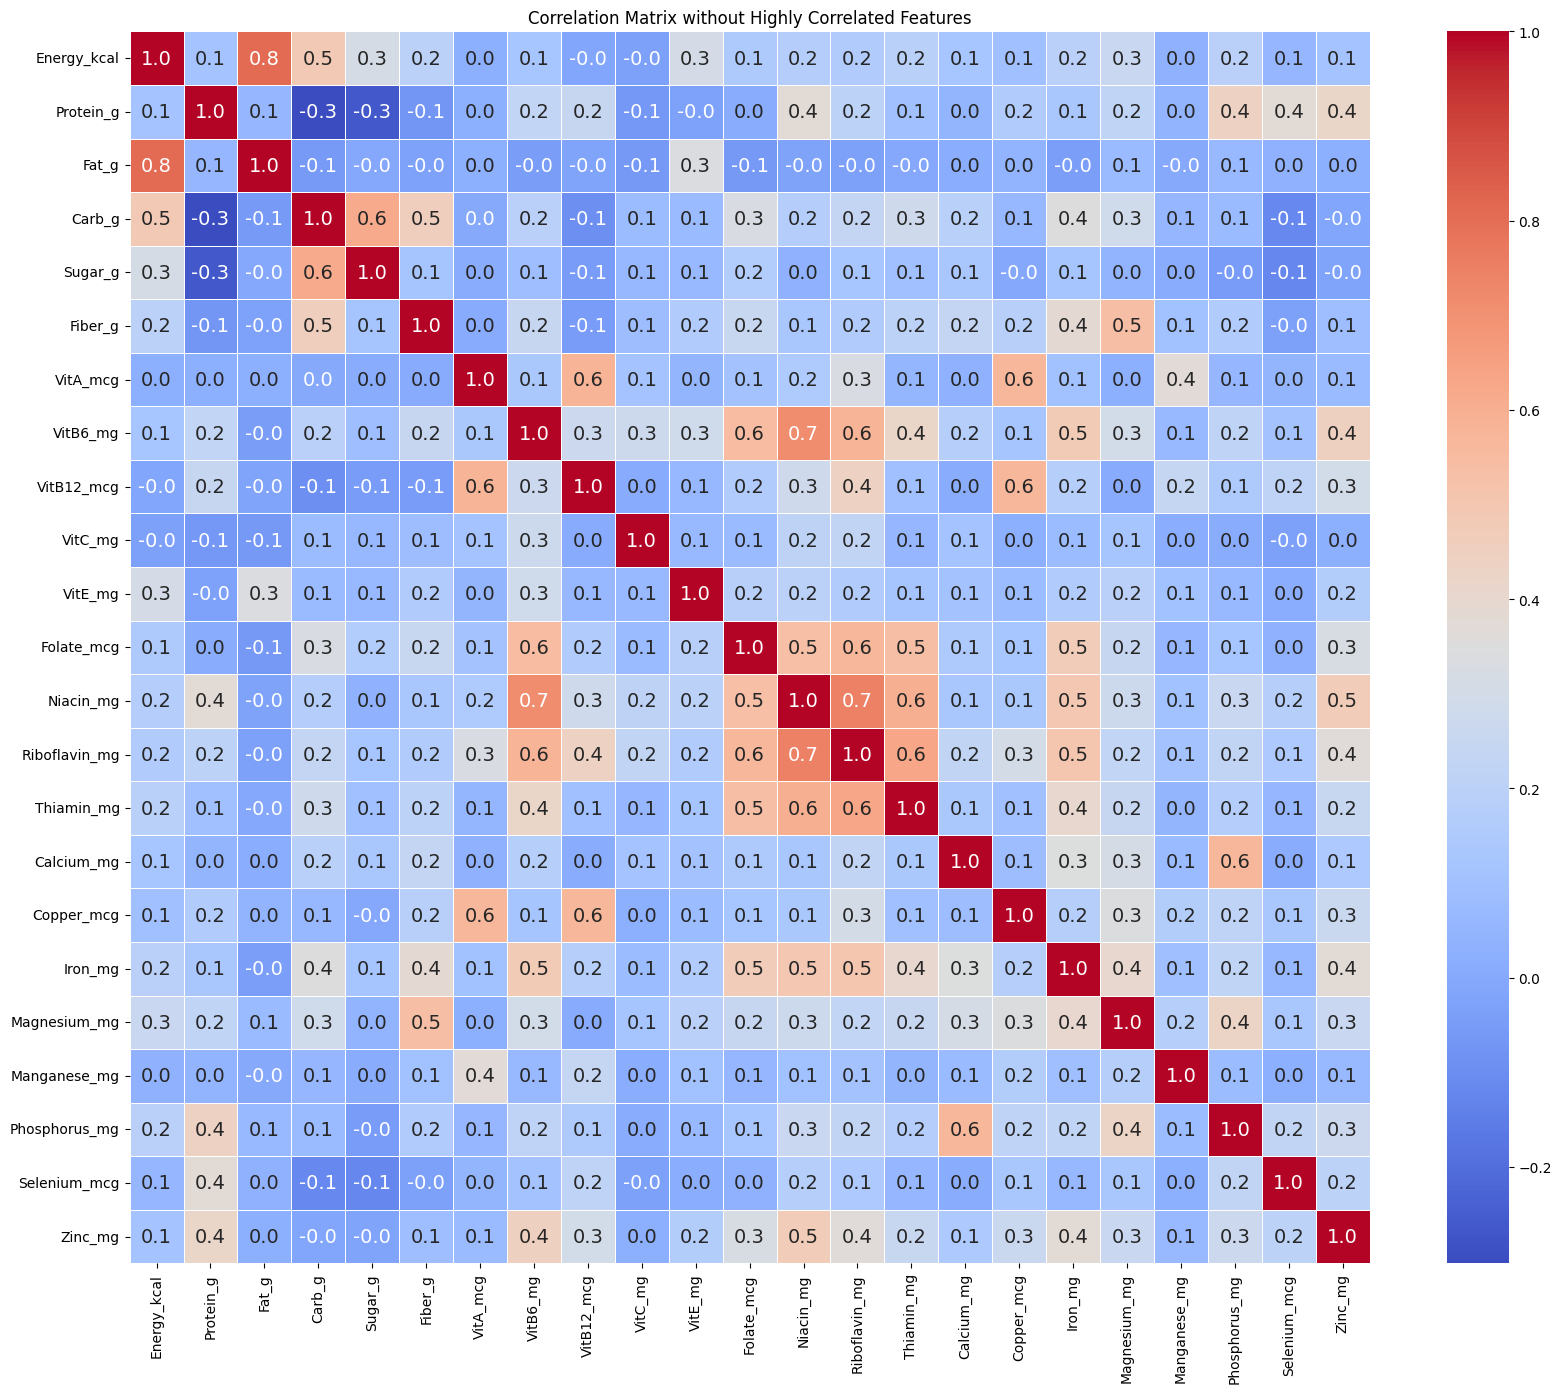

In [8]:
corr_threshold = 0.9
highly_corr_pairs = [
    (row, col, corr_matrix.iloc[row, col])
    for row in range(corr_matrix.shape[0])
    for col in range(row + 1, corr_matrix.shape[1])
    if abs(corr_matrix.iloc[row, col]) > corr_threshold
]

redundant_attrs = set()
for row, col, _ in highly_corr_pairs:
    feature_row = corr_matrix.columns[row]
    feature_col = corr_matrix.columns[col]
    redundant_attrs.add(feature_col)

reduced_numeric_data = updated_numeric_df.drop(columns=redundant_attrs)

plt.figure(figsize=(20, 16))
filtered_corr_matrix = reduced_numeric_data.corr()
sns.heatmap(
    filtered_corr_matrix, 
    annot=True, 
    fmt=".1f", 
    cmap='coolwarm', 
    linewidths=0.5, 
    annot_kws={"size": 14}
)
plt.title('Correlation Matrix without Highly Correlated Features')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

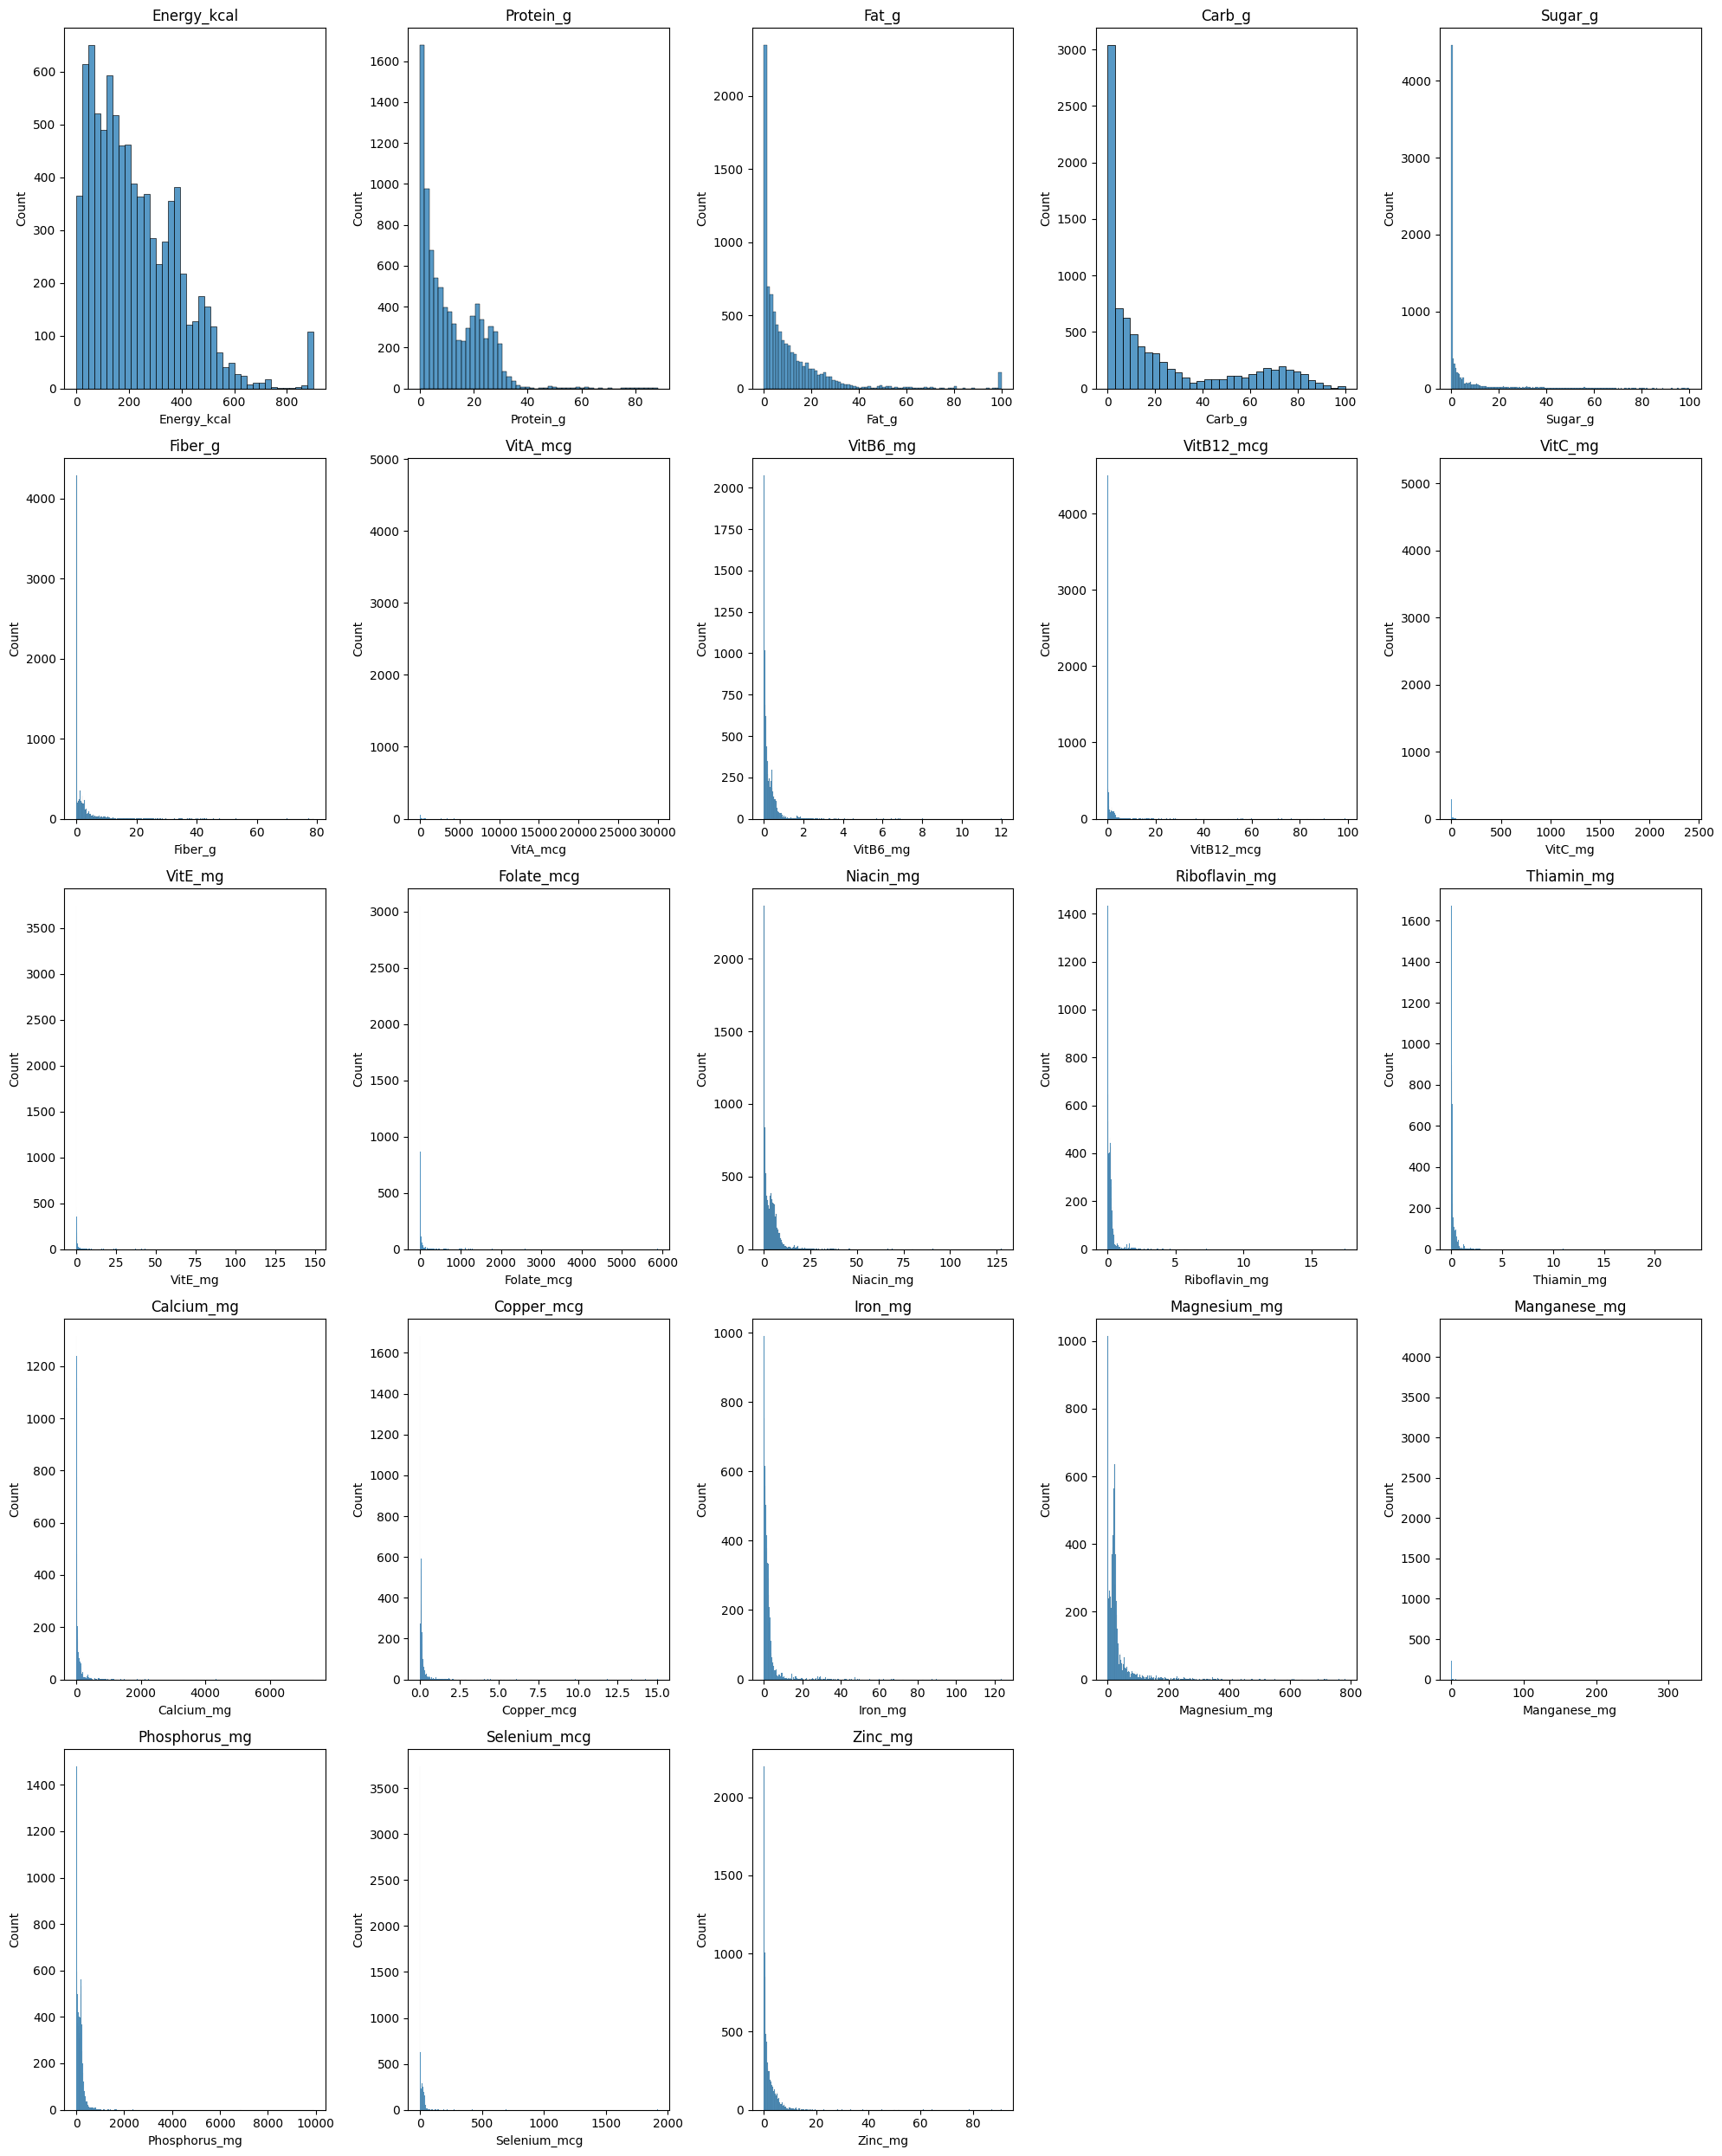

In [9]:
total_features = reduced_numeric_data.shape[1]
cols_per_row = 5
total_rows = (total_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(20, total_rows * 5))
for idx, feature in enumerate(reduced_numeric_data.columns, 1):
    plt.subplot(total_rows, cols_per_row, idx)
    sns.histplot(reduced_numeric_data[feature])
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [10]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
reduced_numeric_data = reduced_numeric_data + 1
df_boxcoxed = pd.DataFrame(index=reduced_numeric_data.index)

for i in reduced_numeric_data.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(reduced_numeric_data.loc[:, i])[0]

Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

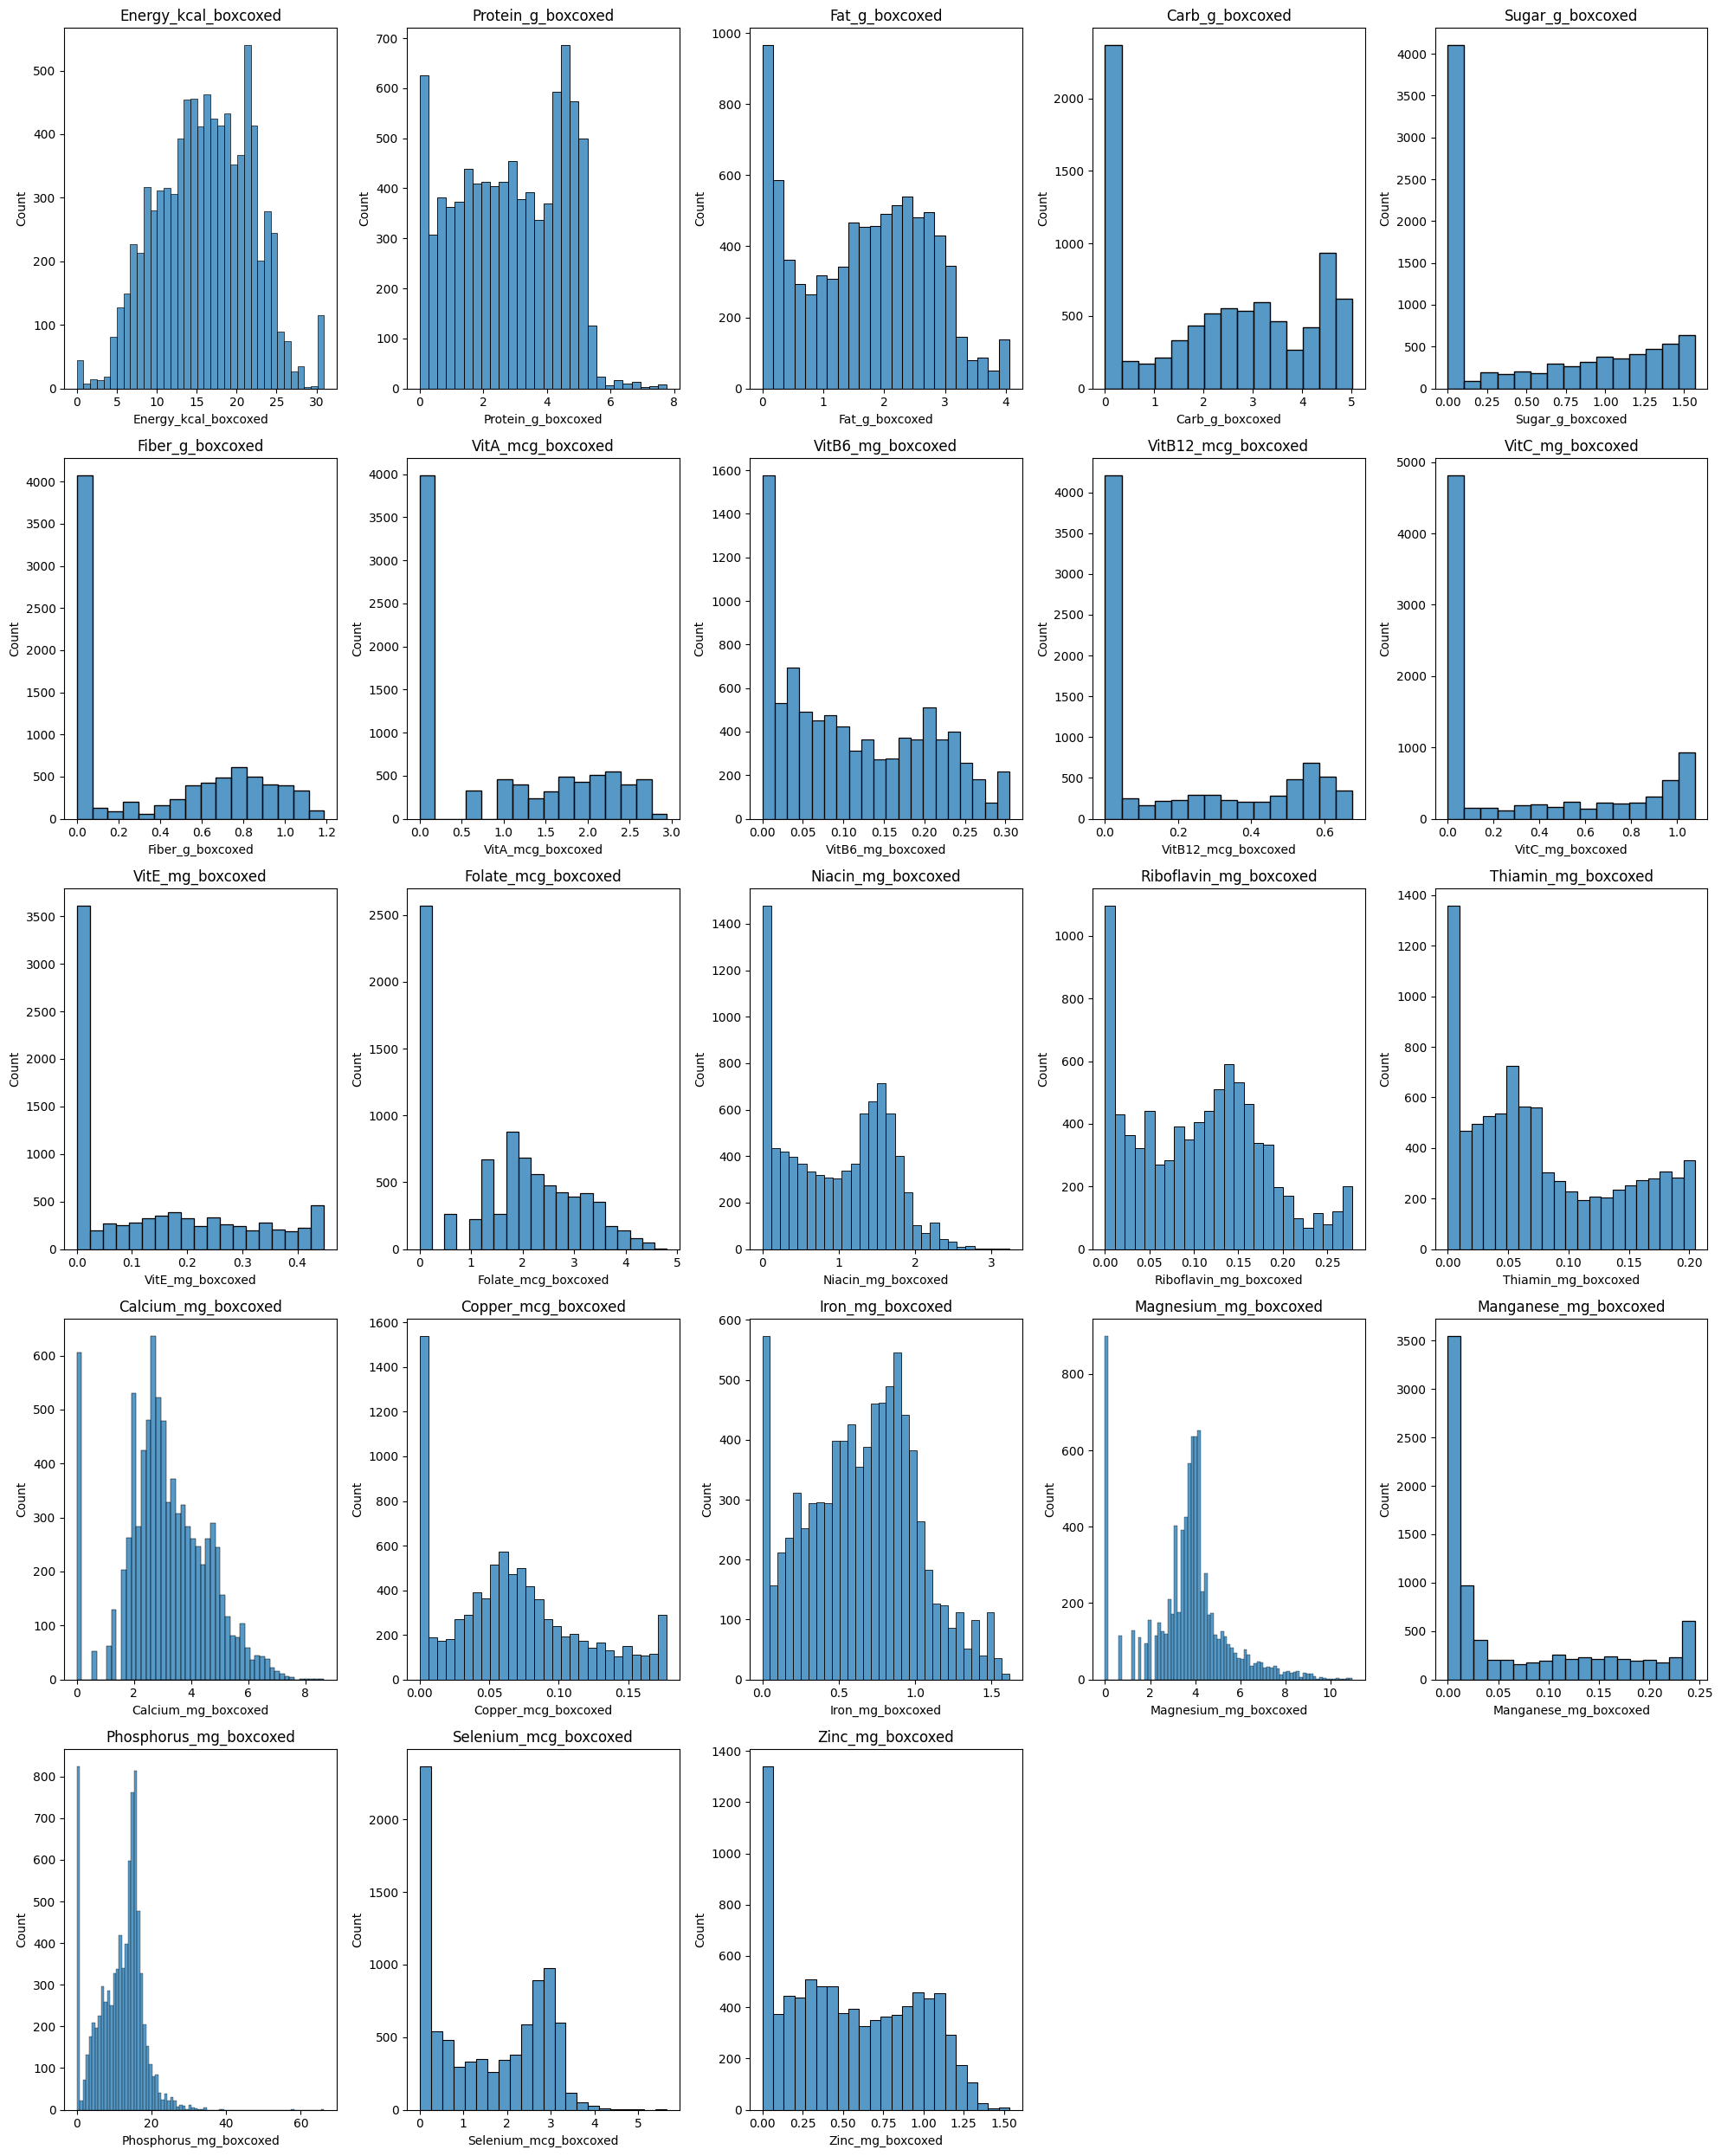

In [11]:
total_features = df_boxcoxed.shape[1]
cols_per_row = 5
total_rows = (total_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(20, total_rows * 5))
for index, feature_name in enumerate(df_boxcoxed.columns, start=1):
    plt.subplot(total_rows, cols_per_row, index)
    sns.histplot(df_boxcoxed[feature_name])
    plt.title(f'{feature_name}')
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_boxcoxed)
scaled_df = pd.DataFrame(scaled_data, columns=df_boxcoxed.columns)
mean_value = round(scaled_df.values.mean())
std_value = round(scaled_df.values.std())
print(f'total mean: {mean_value}')
print(f'total standard dev: {std_value}')

total mean: 0
total standard dev: 1


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [13]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]
        self.components_ = sorted_eigenvectors[:, :self.n_components]
        total_variance = np.sum(sorted_eigenvalues)
        explained_variance = sorted_eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        X_centered = X - self.mean_
        return np.dot(X_centered, self.components_)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components_

Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [14]:
num_components = scaled_df.shape[1]
custom_pca = CustomPCA(n_components=num_components)
custom_pca.fit(scaled_data)
pca_transformed_data = custom_pca.transform(scaled_data)

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


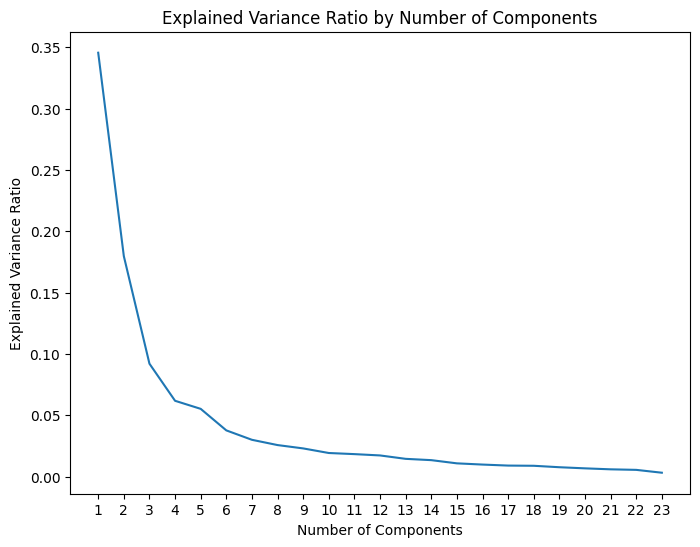

In [16]:
variance_ratios = custom_pca.get_explained_variance_ratio()

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_components + 1), variance_ratios, linestyle='-', marker=None)
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, num_components + 1))
plt.show()

therefore we are going to pick 5 components

In [17]:
cumulative_variance_first_5 = np.sum(variance_ratios[:5])
print(cumulative_variance_first_5)

0.7342383069200744


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [18]:
top_5_components = pca_transformed_data[:, :5]
pc_columns = [f'Principal Component {i+1}' for i in range(5)]
pca_dataframe = pd.DataFrame(top_5_components, columns=pc_columns)
pca_dataframe['FoodGroup'] = df['FoodGroup'].values
pca_dataframe['ShortDescription'] = df['ShortDescrip'].values
pca_dataframe['Description'] = df['Descrip'].values
pca_dataframe['Identifier'] = df['ID'].values
pca_dataframe.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,FoodGroup,ShortDescription,Description,Identifier
0,-2.638414,-1.702512,1.283725,3.759546,2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",1001
1,-2.537931,-1.550464,1.279816,3.634065,2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",1002
2,-3.751335,-2.080190,2.067932,3.668154,2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",1003
3,2.000578,-1.361858,-0.395834,2.432792,0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",1004
4,1.582713,-1.321484,-0.238444,2.597599,1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",1005


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

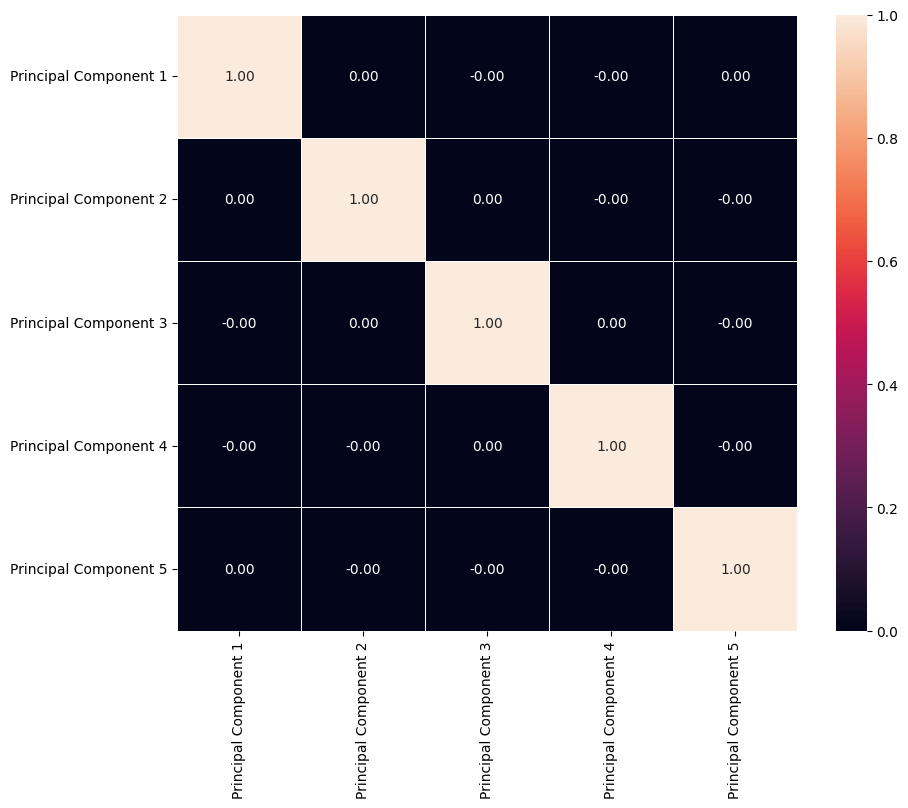

In [19]:
corr_matrix_top_5 = pca_dataframe[pc_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_top_5, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

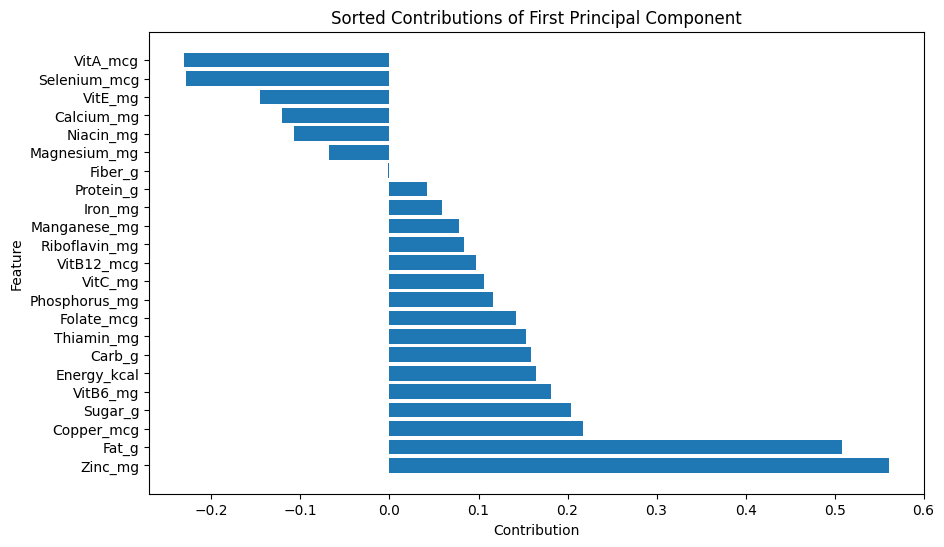

In [20]:
all_components = pca_transformed_data
total_components = all_components.shape[1]
pc_columns = [f'Principal Component {i+1}' for i in range(total_components)]
pca_dataframe = pd.DataFrame(all_components, columns=pc_columns)

first_pc_vector = custom_pca.get_components()[0, :]
first_contrib_df = pd.DataFrame({'Feature': reduced_numeric_data.columns, 'Contribution': first_pc_vector})
sorted_first_contrib_df = first_contrib_df.sort_values(by='Contribution', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_first_contrib_df['Feature'], sorted_first_contrib_df['Contribution'])
plt.xlabel('Contribution')
plt.ylabel('Feature')
plt.title('Sorted Contributions of First Principal Component')
plt.show()

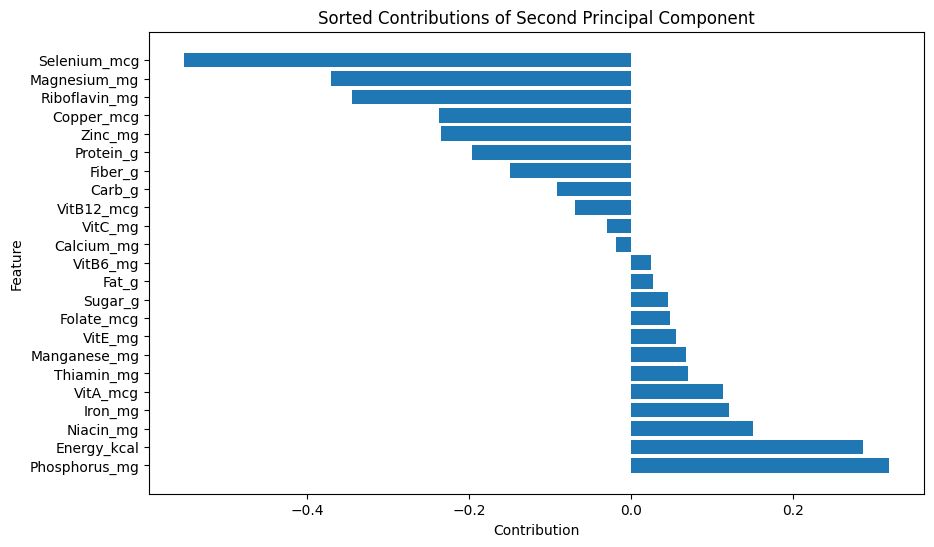

In [21]:
second_pc_vector = custom_pca.get_components()[1, :]
second_contrib_df = pd.DataFrame({'Feature': reduced_numeric_data.columns, 'Contribution': second_pc_vector})
sorted_second_contrib_df = second_contrib_df.sort_values(by='Contribution', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_second_contrib_df['Feature'], sorted_second_contrib_df['Contribution'])
plt.xlabel('Contribution')
plt.ylabel('Feature')
plt.title('Sorted Contributions of Second Principal Component')
plt.show()

### What do these plots tell us about the first and second components?

- If a nutrient has a high positive value in a component vector, it means that the nutrient strongly and positively contributes to that principal component.

- Conversely, if a nutrient has a high negative value in a component vector, it means that the nutrient strongly and negatively contributes to that principal component.

- In the first plot, Zinc_mg and Fat_g have high positive values, indicating that foods rich in zinc and fat are strongly associated with higher scores on PC1.

- Similarly, in the second plot, Niacin_mg and Energy_kcal have high positive values, meaning that foods rich in niacin and energy are strongly associated with higher scores on PC2.



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

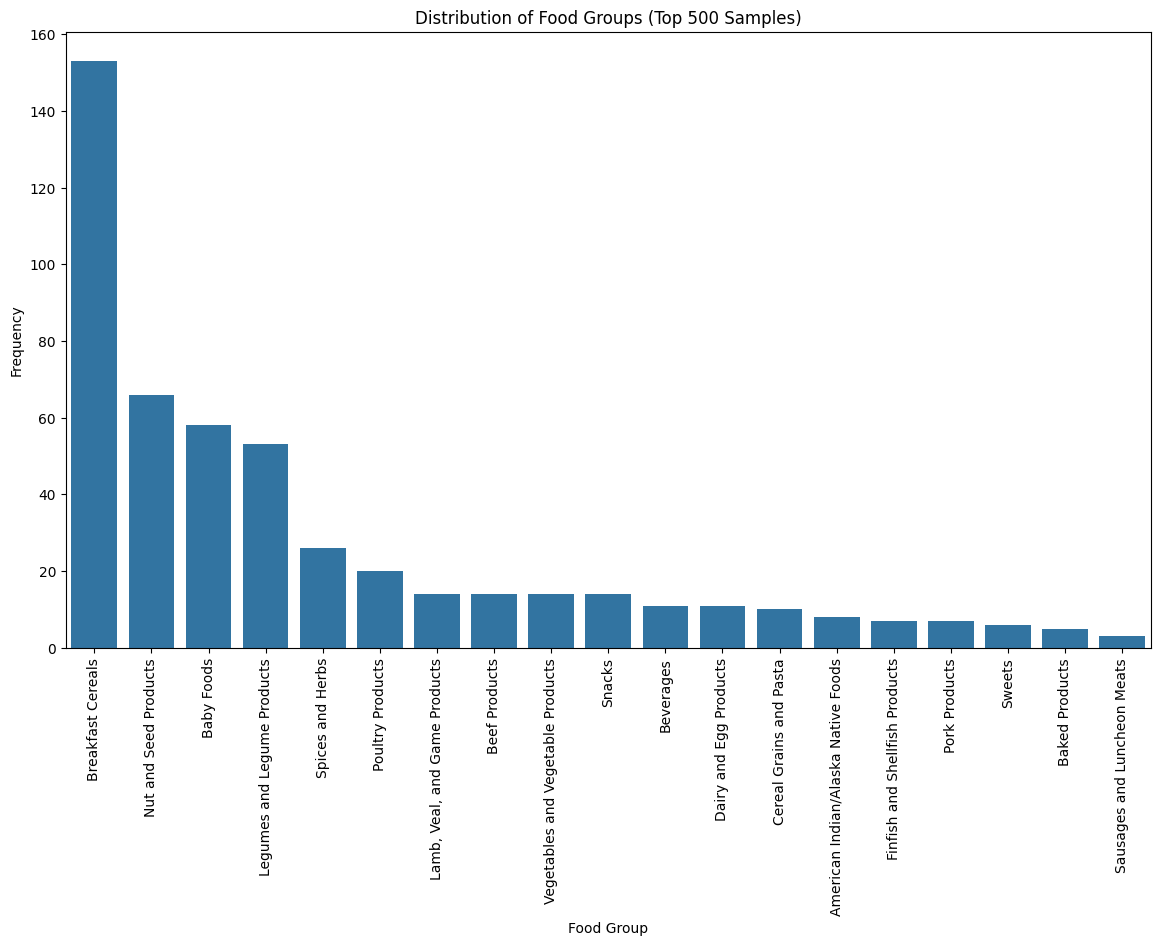

In [29]:
pca_dataframe['FoodGroup'] = df['FoodGroup'].values
top_500_pc1 = pca_dataframe.nlargest(500, 'Principal Component 1')

plt.figure(figsize=(14, 8))
sns.countplot(x=top_500_pc1['FoodGroup'], order=top_500_pc1['FoodGroup'].value_counts().index)
plt.title('Distribution of Food Groups (Top 500 Samples)')
plt.ylabel('Frequency')
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.show()

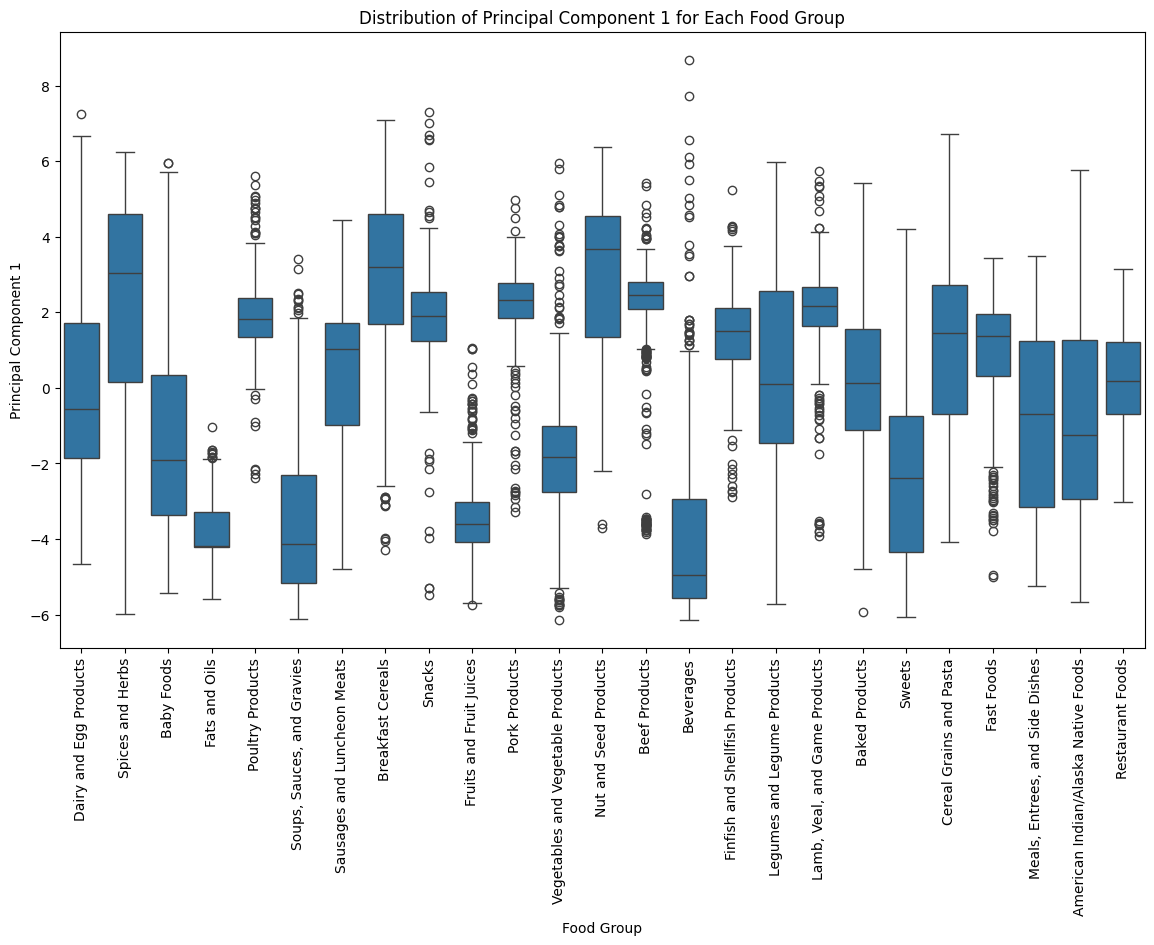

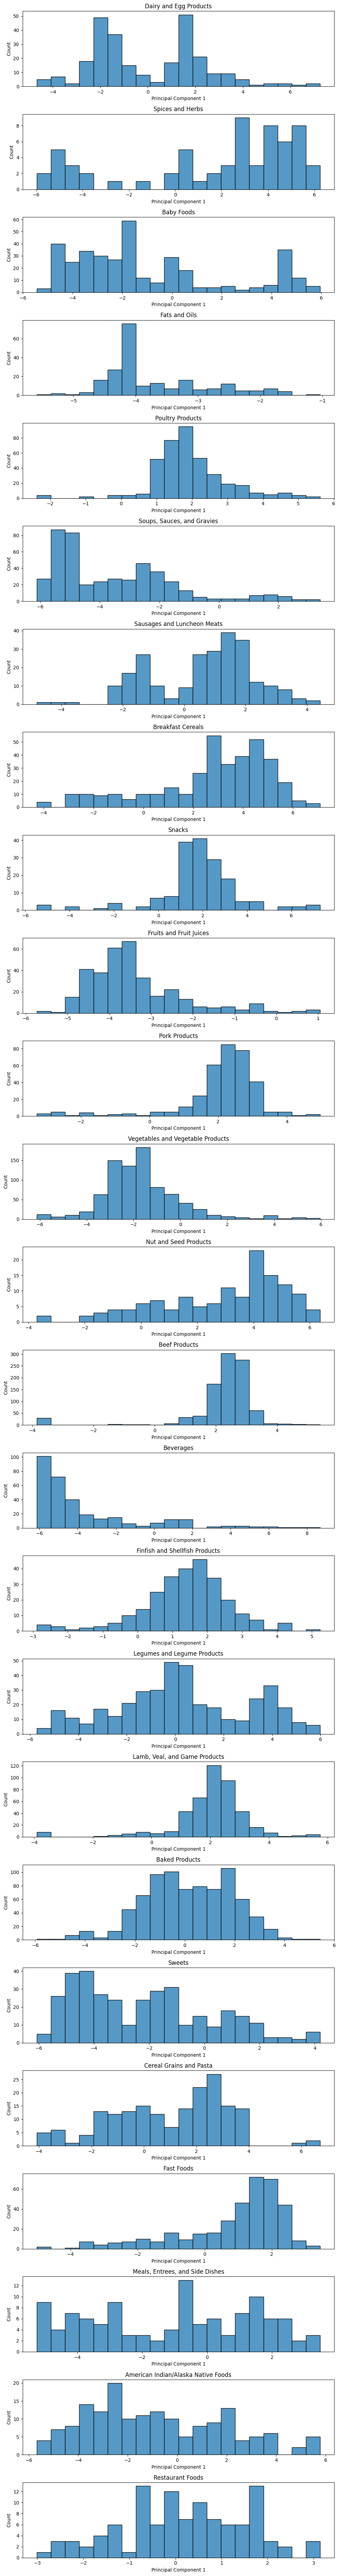

In [23]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='FoodGroup', y='Principal Component 1', data=pca_dataframe)
plt.xticks(rotation=90)
plt.title('Distribution of Principal Component 1 for Each Food Group')
plt.xlabel('Food Group')
plt.ylabel('Principal Component 1')
plt.show()

unique_food_groups = pca_dataframe['FoodGroup'].unique()
total_food_groups = len(unique_food_groups)

plt.figure(figsize=(10, total_food_groups * 3))
for index, group in enumerate(unique_food_groups, start=1):
    plt.subplot(total_food_groups, 1, index)
    sns.histplot(pca_dataframe[pca_dataframe['FoodGroup'] == group]['Principal Component 1'], bins=20)
    plt.title(f'{group}')
    plt.xlabel('Principal Component 1')
plt.tight_layout()
plt.show()

Do the same for pca2.

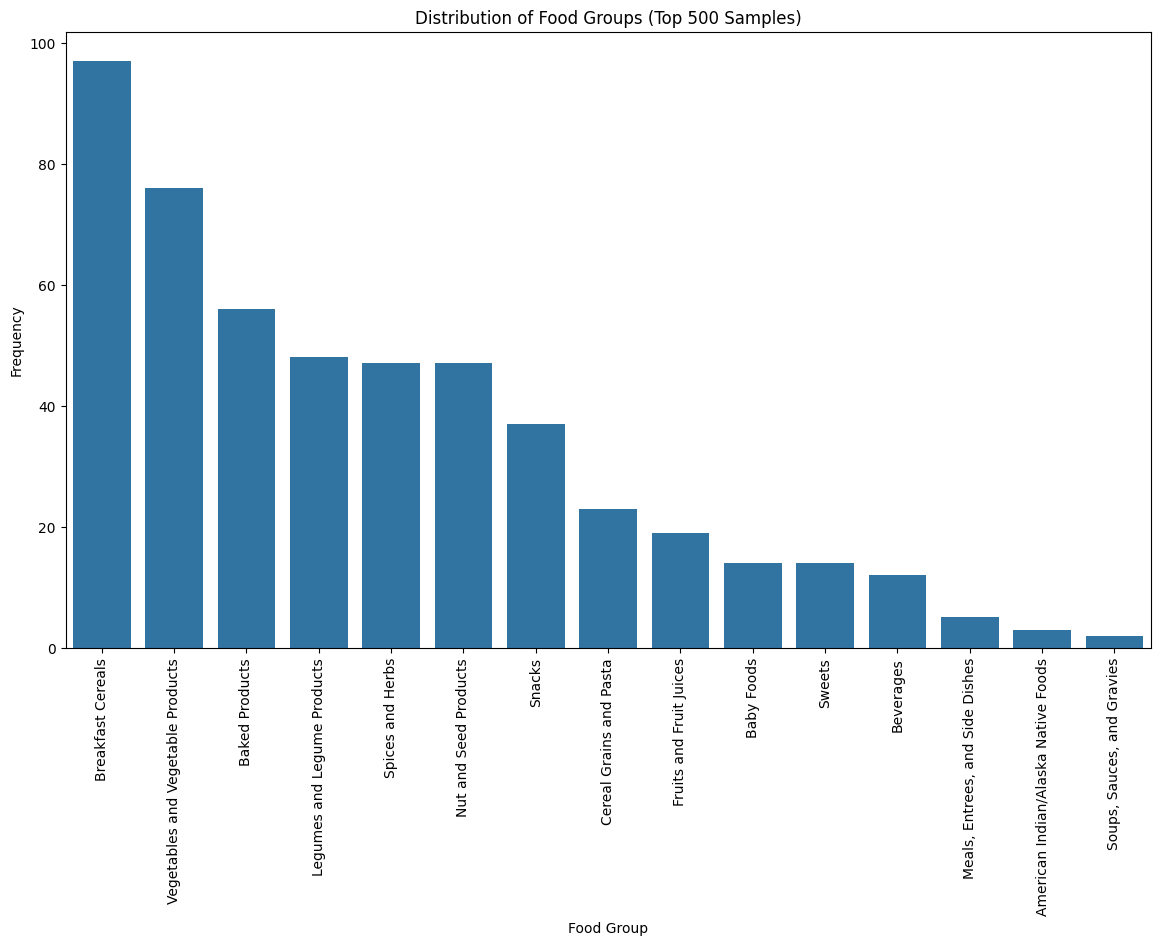

In [28]:
pca_dataframe['FoodGroup'] = df['FoodGroup'].values
top_500_pc2 = pca_dataframe.nlargest(500, 'Principal Component 2')

plt.figure(figsize=(14, 8))
sns.countplot(x=top_500_pc2['FoodGroup'], order=top_500_pc2['FoodGroup'].value_counts().index)
plt.title('Distribution of Food Groups (Top 500 Samples)')
plt.ylabel('Frequency')
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.show()

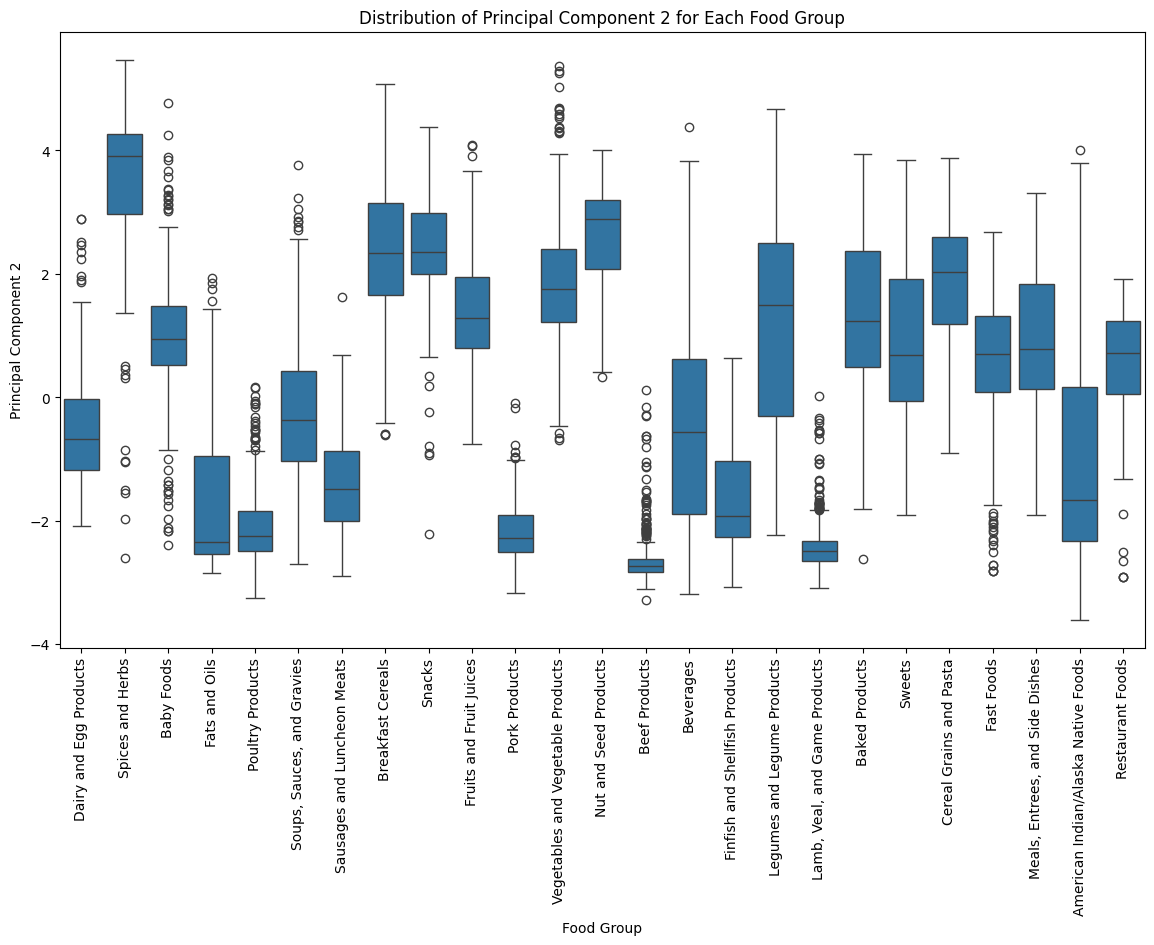

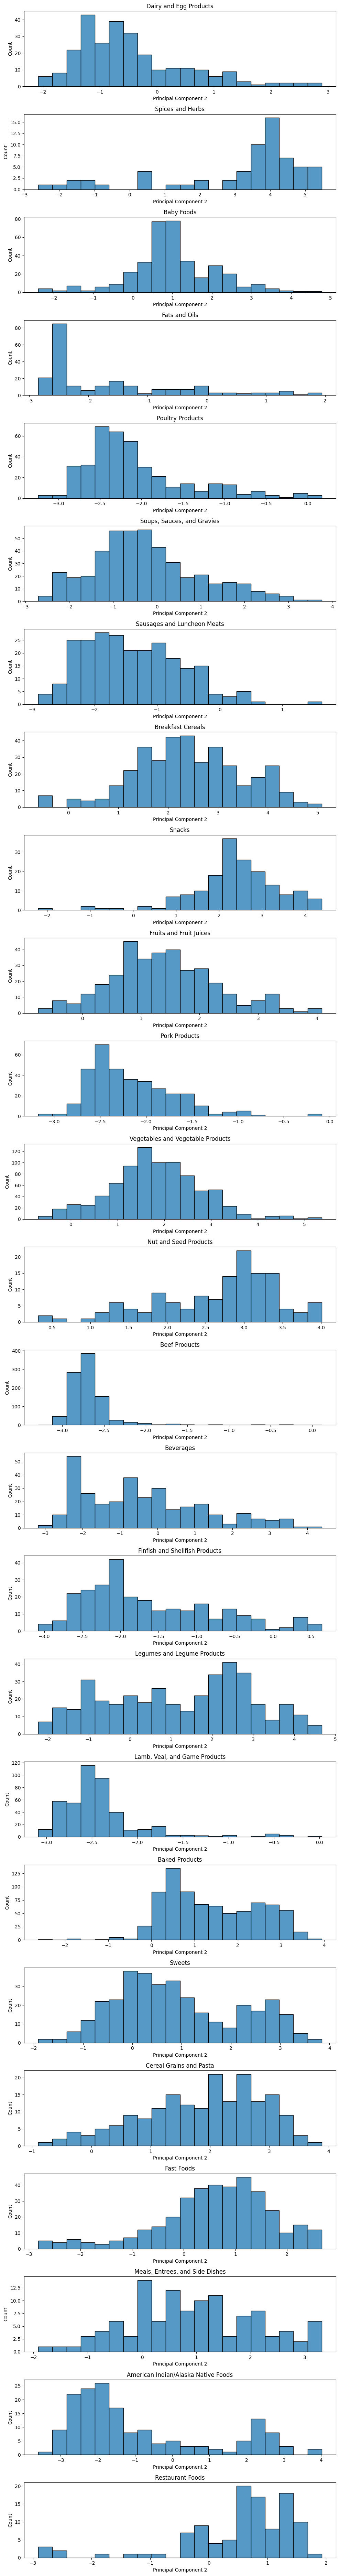

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='FoodGroup', y='Principal Component 2', data=pca_dataframe)
plt.xticks(rotation=90)
plt.title('Distribution of Principal Component 2 for Each Food Group')
plt.xlabel('Food Group')
plt.ylabel('Principal Component 2')
plt.show()

unique_food_groups = pca_dataframe['FoodGroup'].unique()
total_food_groups = len(unique_food_groups)

plt.figure(figsize=(10, total_food_groups * 3))
for index, group in enumerate(unique_food_groups, start=1):
    plt.subplot(total_food_groups, 1, index)
    sns.histplot(pca_dataframe[pca_dataframe['FoodGroup'] == group]['Principal Component 2'], bins=20)
    plt.title(f'{group}')
    plt.xlabel('Principal Component 2')
plt.tight_layout()
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


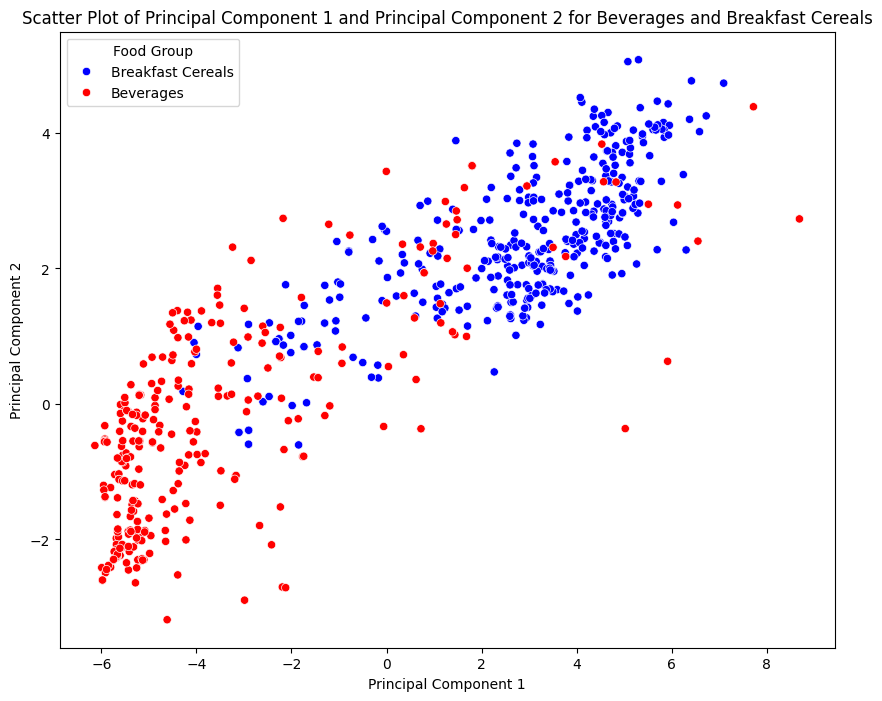

In [27]:
beverages_and_cereals_df = pca_dataframe[pca_dataframe['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=beverages_and_cereals_df, 
    x='Principal Component 1', 
    y='Principal Component 2', 
    hue='FoodGroup', 
    palette=['blue', 'red']
)
plt.title('Scatter Plot of Principal Component 1 and Principal Component 2 for Beverages and Breakfast Cereals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Food Group')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)


We have two scenarios: skewed and centered. For example, snacks exhibit a distribution that is significantly skewed towards higher values. This indicates that "snacks" tend to possess characteristics that correspond with higher PC2 values, potentially representing specific nutritional or compositional features captured by the PCA. Conversely, fruits demonstrate a more centralized distribution, suggesting a wider range of characteristics captured by PC2, reflecting the diversity within this food group.


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

Upon examining the scatter plot, we can discern the distribution for PC1 indicated by the horizontal axis. Specifically, there is a notable concentration of data points with low PC1 values below -4 for beverages, which is also reflected in the distributions. Additionally, the scatter plot encompasses 4 subplots representing two food types in PC1 and PC2. Taking PC2 into account, we can infer that lower PC1 values correspond to lower PC2 values for beverages, and this pattern also applies to Breakfast cereal.

